In [3]:
# http://github.com/aliyasar
# Data Visualisation 
# What are the characteristics of a good visualization example?
# Some of tools and libraries (numpy, pandas, matplotlib etc.)
# What about Python packages? Can you show us how to use them by using a small set of data? (matplotlib, seaborn)

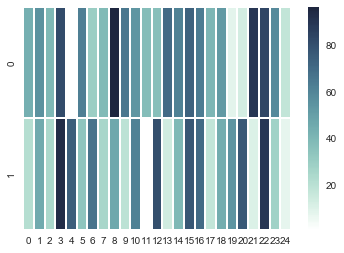

In [4]:
import sys, os
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame()
df.count
#Creating a data frame
#------------------------------


df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)
# Random number generation (1-100)
#------------------------------

cr = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
# Define color and line paramters for seaborn functions clustergrid and heatmap
#------------------------------

sns.heatmap([df.y, df.x], linewidth=1,cmap=cr)

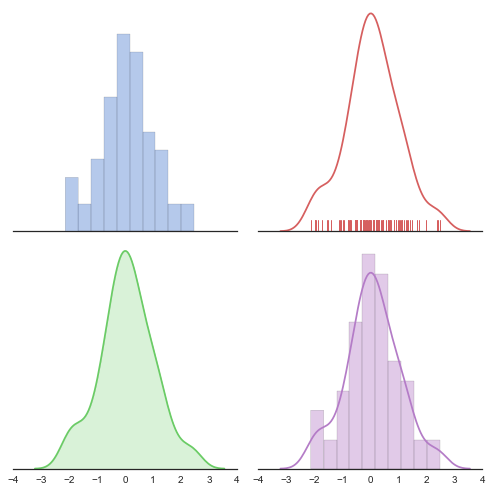

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

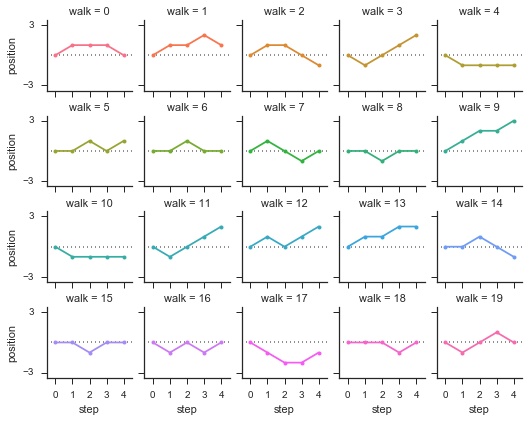

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

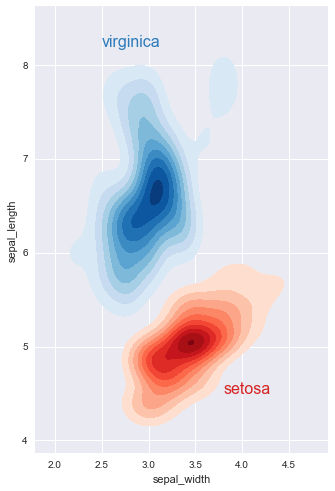

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

In [17]:
import pandas as pd
df = pd.read_csv('FL_insurance_sample.csv')
df.count()

policyID              36634
statecode             36634
county                36634
eq_site_limit         36634
hu_site_limit         36634
fl_site_limit         36634
fr_site_limit         36634
tiv_2011              36634
tiv_2012              36634
eq_site_deductible    36634
hu_site_deductible    36634
fl_site_deductible    36634
fr_site_deductible    36634
point_latitude        36634
point_longitude       36634
line                  36634
construction          36634
point_granularity     36634
dtype: int64

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('FL_insurance_sample.csv')
df

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0,9979.2,0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0,0.0,0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0,0.0,0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0,0.0,0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0,0.0,0,0,30.060614,-81.702675,Residential,Wood,1
5,785275,FL,CLAY COUNTY,0.0,515035.62,0.0,0.0,515035.62,884419.17,0,0.0,0,0,30.063236,-81.707703,Residential,Masonry,3
6,995932,FL,CLAY COUNTY,0.0,19260000.00,0.0,0.0,19260000.00,20610000.00,0,0.0,0,0,30.102226,-81.713882,Commercial,Reinforced Concrete,1
7,223488,FL,CLAY COUNTY,328500.0,328500.00,328500.0,328500.0,328500.00,348374.25,0,16425.0,0,0,30.102217,-81.707146,Residential,Wood,1
8,433512,FL,CLAY COUNTY,315000.0,315000.00,315000.0,315000.0,315000.00,265821.57,0,15750.0,0,0,30.118774,-81.704613,Residential,Wood,1
9,142071,FL,CLAY COUNTY,705600.0,705600.00,705600.0,705600.0,705600.00,1010842.56,14112,35280.0,0,0,30.100628,-81.703751,Residential,Masonry,1


In [12]:
df.max()

policyID                         999971
statecode                            FL
county                WASHINGTON COUNTY
eq_site_limit                  2.16e+09
hu_site_limit                  2.16e+09
fl_site_limit                  2.16e+09
fr_site_limit                  2.16e+09
tiv_2011                       2.16e+09
tiv_2012                      1.701e+09
eq_site_deductible          6.27376e+06
hu_site_deductible             7.38e+06
fl_site_deductible               450000
fr_site_deductible               900000
point_latitude                  30.9898
point_longitude                -80.0333
line                        Residential
construction                       Wood
point_granularity                     7
dtype: object

In [13]:
df.min()

policyID                      100074
statecode                         FL
county                ALACHUA COUNTY
eq_site_limit                      0
hu_site_limit                      0
fl_site_limit                      0
fr_site_limit                      0
tiv_2011                          90
tiv_2012                       73.37
eq_site_deductible                 0
hu_site_deductible                 0
fl_site_deductible                 0
fr_site_deductible                 0
point_latitude               24.5475
point_longitude             -87.4473
line                      Commercial
construction                 Masonry
point_granularity                  1
dtype: object

In [16]:
df.all()

policyID               True
statecode              True
county                 True
eq_site_limit         False
hu_site_limit         False
fl_site_limit         False
fr_site_limit         False
tiv_2011               True
tiv_2012               True
eq_site_deductible    False
hu_site_deductible    False
fl_site_deductible    False
fr_site_deductible    False
point_latitude         True
point_longitude        True
line                   True
construction           True
point_granularity      True
dtype: bool